In [250]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from surprise import Dataset,Reader
from surprise.model_selection import train_test_split

from surprise import KNNWithMeans
from surprise import accuracy

from surprise import SVD
from surprise import accuracy

from sklearn.model_selection import train_test_split as tt_split


In [251]:
input_data=pd.read_csv('ratings_Electronics.csv',names=['CustomerID','ItemID','Rating','Timestamp'])
input_data.head()

,CustomerID,ItemID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [252]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
CustomerID    object
ItemID        object
Rating        float64
Timestamp     int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


In [253]:
input_data.shape

(7824482, 4)

## Data Analysis

In [254]:
input_data['CustomerID'].value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A38RMU1Y5TDP9     282
A3EXWV8FNSSFL6    282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A12DQZKRKTNF5E    252
A231WM2Z2JL0U3    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A1T1YSCDW0PD25    227
                 ... 
A1IIQ4HB386M0A      1
A8IHP9P82IYQD       1
A31CCVF98E5F0R      1
AV0AEC6A4HQCW       1
A1CDS5BYCCPS2N      1
A1UFWUSAJSKVZ2      1
A1J2L5S9T4ZNSL      1
A3P6USMX1IP08P      1
A2VZ334GU2T3HC      1
A1FIUZX5NXPZQX      1
ADZ21BBXV78A3       1
A2NM4MPIKR31RX      1
A3RF05REQ37H41      1
A1VZ09D7ID88XJ      1
A1P0RDLJ80

In [255]:
input_data['ItemID'].value_counts()

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
B003ELYQGG    11617
B003ES5ZUU    10276
B007R5YDYA     9907
B00622AG6S     9823
B0002L5R78     9487
B008OHNZI0     8966
B003LR7ME6     8840
B000LRMS66     8715
B009SYZ8OC     8370
B00BGA9WK2     7561
B004QK7HI8     7060
B009A5204K     7059
B00BGGDVOO     6893
B0098F5W0Q     6616
B002MAPRYU     6599
B002WE6D44     6509
B005HMKKH4     6134
B0012S4APK     5642
B0052YFYFK     5521
B0001FTVEK     5345
B0044YU60M     5239
B00316263Y     5038
B000I68BD4     4903
B006ZP8UOW     4842
B0041Q38NU     4774
              ...  
B009994IOM        1
B00I5HIVTM        1
B000050ZS6        1
B009FRKE0K        1
B0000YA6WS        1
B00CIXT4C2        1
B00B8W47JY        1
B003VPYJRG        1
B000RJ0E96        1
B00AL2IMX4        1
B003F8KQXA        1
B004WYTO8Y        1
B002W4ZT6M        1
B000ZMWO7A        1
B00ISDKHUE        1
B009UHC80Y        1
B00BI2YJT2        1
B000EPM9F0        1
B00J5F70QI        1


In [256]:
data=input_data.groupby('CustomerID').filter(lambda x : len(x) > 100)
data.head()

,CustomerID,ItemID,Rating,Timestamp
118,AT09WGFUM934H,0594481813,3.0,1377907200
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
631,A3TAS1AG6FMBQW,0972683275,5.0,1353456000
1777,A18S2VGUH9SCV5,1400501776,4.0,1340755200
2162,A5JLAU2ARJ0BO,1400532655,1.0,1291334400


In [257]:
data.shape

(43309, 4)

### Univariant Analysis

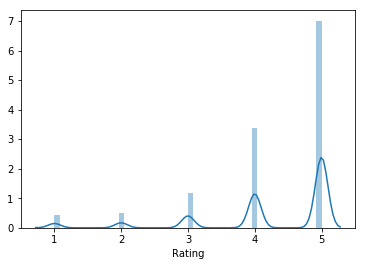

In [261]:
sns.distplot(data['Rating'])

In [262]:
data.reset_index(inplace=True)
data.drop(columns=['index'],inplace=True)
data.head()

C:\Users\windows\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,level_0,CustomerID,ItemID,Rating,Timestamp
0,0,AT09WGFUM934H,0594481813,3.0,1377907200
1,1,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
2,2,A3TAS1AG6FMBQW,0972683275,5.0,1353456000
3,3,A18S2VGUH9SCV5,1400501776,4.0,1340755200
4,4,A5JLAU2ARJ0BO,1400532655,1.0,1291334400


In [263]:
#Since the timestamp column is not needed, we can drop it

In [264]:
data.drop(columns='Timestamp',inplace=True)

In [265]:
#Unique items in DF
print("The no of unique items in the data is", len(data['ItemID'].unique()))

#Unique Customers in DF
print("The no of unique customers in the data is", len(data['CustomerID'].unique()))

The no of unique items in the data is 22267
The no of unique customers in the data is 280


In [266]:
#Active customers - Those who given more no of ratings
data['CustomerID'].value_counts().head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: CustomerID, dtype: int64

### Transforming data to SURPRISE format

In [267]:
reader = Reader(rating_scale=(1, 5))

In [268]:
surp_data=Dataset.load_from_df(data[['CustomerID','ItemID','Rating']],reader)
surp_data

In [269]:
trainset,testset =train_test_split(surp_data, test_size=0.3,random_state=1)

In [270]:
print(type(testset))
print(type(trainset))

#Raw ids are normal data. the Raw ids are mapped to inner ids
#trainset contain these inner ids

<class 'list'>
<class 'surprise.trainset.Trainset'>


In [271]:
#From the above link we see that .ur represent user ratings

user_ratings=trainset.ur
type(user_ratings)

collections.defaultdict

In [272]:
for keys in user_ratings.keys():
    print(keys)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [273]:
#For first user
#These are inner ids

user_ratings[0]

[(0, 5.0),
 (13, 5.0),
 (52, 1.0),
 (98, 4.0),
 (341, 5.0),
 (896, 2.0),
 (926, 4.0),
 (1041, 3.0),
 (1229, 2.0),
 (1244, 3.0),
 (1297, 5.0),
 (1424, 5.0),
 (586, 2.0),
 (1641, 5.0),
 (1797, 3.0),
 (2309, 4.0),
 (2811, 5.0),
 (2840, 3.0),
 (2903, 5.0),
 (3086, 1.0),
 (385, 4.0),
 (3280, 4.0),
 (3513, 2.0),
 (3547, 5.0),
 (3681, 2.0),
 (618, 1.0),
 (3881, 4.0),
 (3989, 1.0),
 (4024, 1.0),
 (4057, 4.0),
 (4078, 4.0),
 (3693, 4.0),
 (899, 4.0),
 (4682, 5.0),
 (4716, 4.0),
 (4970, 3.0),
 (5451, 4.0),
 (5472, 2.0),
 (5508, 5.0),
 (3126, 5.0),
 (5733, 5.0),
 (5994, 2.0),
 (6127, 2.0),
 (3070, 5.0),
 (6317, 3.0),
 (6402, 3.0),
 (6467, 4.0),
 (4141, 1.0),
 (6503, 4.0),
 (6613, 5.0),
 (6743, 4.0),
 (6950, 4.0),
 (6115, 5.0),
 (7113, 5.0),
 (7236, 5.0),
 (7275, 2.0),
 (7482, 1.0),
 (495, 1.0),
 (7638, 3.0),
 (2331, 2.0),
 (7845, 5.0),
 (6525, 4.0),
 (5507, 3.0),
 (8346, 3.0),
 (6863, 4.0),
 (8410, 4.0),
 (8563, 1.0),
 (2369, 2.0),
 (8794, 1.0),
 (8975, 5.0),
 (9005, 5.0),
 (9401, 2.0),
 (5053, 4

In [274]:
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

#Convert a user inner id to a raw id.
print(trainset.to_raw_uid(0))

#Convert an item inner id to a raw id.
print(trainset.to_raw_iid(0))

A1F9Z42CFF9IAY
B000053HC5


## Training and Performance Testing of Collaborative Filtering 

##### Using KNN

In [276]:
knn_model = KNNWithMeans(k=10,sim_options={'name':'cosine' , 'user_based':False})
knn_model.fit(trainset)

#Item Item similarity matrix has been created now

Computing the cosine similarity matrix...


MemoryError: 

In [277]:
len(testset)

12993

In [278]:
#Evaluation on testset

test_pred_knn=knn_model.test(testset)

# compute RMSE
accuracy.rmse(test_pred_knn)

AttributeError: 'KNNWithMeans' object has no attribute 'sim'

In [279]:
#Lets predict for 11th one

test_pred_knn[10]

Prediction(uid='A100WO06OQR8BQ', iid='B000KI81XK', r_ui=5.0, est=4.0, details={'actual_k': 0, 'was_impossible': False})

In [280]:
#Convert result to DF

test_pred_df = pd.DataFrame(test_pred_knn)
test_pred_df

,uid,iid,r_ui,est,details
0,A33YZNZIRA3H97,B008IEGSGU,4.0,4.287958,"{'was_impossible': True, 'reason': 'User and/o..."
1,A25C2M3QF9G7OQ,B002TLDJ6K,5.0,4.287958,"{'was_impossible': True, 'reason': 'User and/o..."
2,A1J75JJ0Q2OEJN,B0086YQI30,4.0,4.287958,"{'was_impossible': True, 'reason': 'User and/o..."
3,A231WM2Z2JL0U3,B0000696R8,5.0,4.287958,"{'was_impossible': True, 'reason': 'User and/o..."
4,A2XRMQA6PJ5ZJ8,B005DLDO4U,5.0,5.000000,"{'actual_k': 0, 'was_impossible': False}"
5,A19UTUEBWKIZFT,B00IF0QIAI,4.0,4.287958,"{'was_impossible': True, 'reason': 'User and/o..."
6,A1T1YSCDW0PD25,B00IRX1NXK,5.0,4.287958,"{'was_impossible': True, 'reason': 'User and/o..."
7,A3HR0ZZOFKQ97N,B004CAHTCQ,5.0,5.000000,"{'actual_k': 0, 'was_impossible': False}"
8,A370XYLIZCSK1Y,B004W2JL2A,5.0,4.287958,"{'was_impossible': True, 'reason': 'User and/o..."
9,A3CG93783LP0FO,B0046TEQC4,5.0,4.500000,"{'actual_k': 1, 'was_impossible': False}"


In [281]:
#was_impossible=false: are only calculated

testset_new = trainset.build_anti_testset()
len(testset_new)

4834404

In [282]:
#Lets fetch top 5 values

testset_new[0:5]

[('A1F9Z42CFF9IAY', 'B0020NY7MW', 4.281270616176276),
 ('A1F9Z42CFF9IAY', 'B008X9Z528', 4.281270616176276),
 ('A1F9Z42CFF9IAY', 'B003U8I240', 4.281270616176276),
 ('A1F9Z42CFF9IAY', 'B004UKRRD4', 4.281270616176276),
 ('A1F9Z42CFF9IAY', 'B007RB164E', 4.281270616176276)]

In [283]:
predictions = knn_model.test(testset_new)

AttributeError: 'KNNWithMeans' object has no attribute 'sim'

In [ ]:
predictions_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in predictions])

In [ ]:
predictions_df.head()

In [ ]:
predictions_df.columns = ["CustomerID","ItemID","Est_rating"]
predictions_df.sort_values(by = ["CustomerID","ItemID", "Est_rating"],ascending=False,inplace=True)

In [ ]:
predictions_df.head()

In [ ]:
#Representing top 5 Recommendations for each Customers


top_5_recos = predictions_df.groupby("CustomerID").head(5).reset_index(drop=True)
top_5_recos

## Training and Performance Testing of Popularity based Model 

In [ ]:
#No of ratings for each Item

item_group = data.groupby(['ItemID']).agg({'Rating' : 'count'}).reset_index()
item_group.head()

In [284]:
#Rating's total

grouped_sum = item_group['Rating'].sum()
print(grouped_sum)

#Thus we have a rating sum of 43309 

43309


In [285]:
item_group['Percentage'] = item_group['Rating'].div(grouped_sum)*100

In [286]:
item_group.sort_values(['Rating'], ascending = False)

,ItemID,Rating,Percentage
17814,B0088CJT4U,71,0.163938
10704,B002R5AM7C,58,0.133921
11910,B003ES5ZUU,54,0.124685
17676,B00829TIEK,49,0.113140
13567,B004CLYEDC,49,0.113140
5560,B000N99BBC,47,0.108522
17949,B008DWCRQW,45,0.103905
17672,B00829THK0,44,0.101596
13569,B004CLYEFK,43,0.099287
10781,B002SQK2F2,39,0.090051


In [287]:
train_data, test_data = train_test_split(data, test_size = 0.3, random_state = 1)

AttributeError: 'DataFrame' object has no attribute 'raw_ratings'

In [288]:
#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'CustomerID': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to
    #make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['CustomerID'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations

In [289]:
pm = popularity_recommender_py()

In [290]:
pm.create(train_data,'CustomerID','ItemID')

In [291]:
customers = data['CustomerID'].unique()
len(customers)

280

In [292]:
items = data['ItemID'].unique()
len(items)

22267

In [293]:
#Find Recommendation for a particular Customer

cust_id=customers[7]
pm.recommend(cust_id)


#This represents the top 10 items recommended for the customer A3PD8JD9L4WEII

,CustomerID,ItemID,score,Rank
13675,A3PD8JD9L4WEII,B0088CJT4U,55,1.0
8141,A3PD8JD9L4WEII,B002R5AM7C,41,2.0
9088,A3PD8JD9L4WEII,B003ES5ZUU,39,3.0
10357,A3PD8JD9L4WEII,B004CLYEDC,36,4.0
13564,A3PD8JD9L4WEII,B00829THK0,34,5.0
13785,A3PD8JD9L4WEII,B008DWCRQW,34,6.0
13568,A3PD8JD9L4WEII,B00829TIEK,31,7.0
8199,A3PD8JD9L4WEII,B002SQK2F2,30,8.0
10359,A3PD8JD9L4WEII,B004CLYEFK,30,9.0
4163,A3PD8JD9L4WEII,B000N99BBC,29,10.0


## Item based Recommendation

In [294]:
#Class for Item similarity based Recommender System model
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['CustomerID', 'ItemID', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no item for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique items for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique items in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique items in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations


In [295]:
item_model = item_similarity_recommender_py()

In [296]:
item_model.create(train_data,'CustomerID','ItemID')

In [297]:
#Find recommendation for User with id 5

custo_id = customers[5]

In [298]:
user_items = item_model.get_user_items(custo_id)

In [299]:
print('--------------------------------------------------------')
print("Training data items for the user userId: %s:" %custo_id)
print('--------------------------------------------------------')


--------------------------------------------------------
Training data items for the user userId: A3HPCRD9RX351S:
--------------------------------------------------------


In [ ]:
for user_item in user_items:
    print(user_item)
    
print('--------------------------------------------------------')
print("Recommendation process is going on:" )
print('--------------------------------------------------------')

#Recommend items for the user using personalized model
item_model.recommend(custo_id)

B003YKG2UK
B00007B4DT
B005TN0NIW
B007G5NNOW
B0081TKWWS
B000I68BD4
B003ELYQGG
B000JMJWV2
B00902SFC4
B006JPGM48
B003ZA5M96
B001TK3QV0
B00795K7J8
B0069JKHMM
B007Y4NWQE
B003CJTQJW
B00CZDT30S
B007YDAARE
B003KN3IXU
B00004ZCKV
B0009E7D34
B004JQQDZ2
B005EQS9HG
B007OY5V68
B00427Z7NM
B00B8O6IIK
B008WXKYX0
B004FOZ2XW
B00B3YQGHS
1400532655
B003ORXRT2
B00HZ9GPTE
B009B0MZ1M
B001FR8POU
B0002E3WIQ
B00330O2U8
B00575RN62
B00009MJK7
B007TEE966
B00062QY5W
B0000AG92Z
B00GFWZK8E
B0009WG6KM
B005DSPLCQ
B0065MMK8W
B00BCGRZ04
B00006HOKR
B0043VE28S
B00D5Q25DQ
B000HPAKB2
B00395WIXA
B0041RSPR8
B0054RJ66I
B006U1YVZ8
B000T6NTLW
B000CP4ML6
B007B61GAO
B000EXT5AY
B008LTBHYU
B002W6Z80C
B0035JD0C8
B001D4FZWA
B00DJNCS6O
B005CLPP8E
B002JQNXZC
B005JVO2KO
B0012QCYNM
B002KTL706
B000VOAN5M
B00HPM1G8Q
B00FLZ2F5W
B0017T72AE
--------------------------------------------------------
Recommendation process is going on:
--------------------------------------------------------
No. of unique items for the user: 72
no. of unique items i